In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from scipy.optimize import shgo
from mpl_toolkits.mplot3d import Axes3D

import topo_generic as topo
import JHD
import importlib
importlib.reload(topo)
importlib.reload(JHD)

%matplotlib inline
#%matplotlib widget  ## better to use this for interactive plot with jupyter lab

# Energy spectrum (fig4.b)



Energy spectrum is plotted for an asymmetric JHD, so the degeneracies are not along $\phi_L=\phi_R$.
The function cut() allows to plot the energy spectrum along any linear combination of $\phi_L$ and $\phi_R$.

In [77]:
#return a vector of phiL phiR along a direction given by param
def cut(slope,offset,phiLmin,phiLmax,dim):
    length=phiLmax-phiLmin
    phiLlist=np.zeros([dim])
    phiRlist=np.zeros([dim])
    for i in range(dim):
        phiLlist[i]=phiLmin+length*i/(dim-1)
        phiRlist[i]=(phiLmin+length*i/(dim-1))*slope + offset 
    return phiLlist, phiRlist

## $\phi_B=0$

**compute spectrum**

==> can be skipped by loading data below

In [21]:
# %%time
N=13
nbands=9

#init all param to base value
Ej,Ec=1,1

ng=0.259775456
ng1=ng2=ng
asym=[1,0.8,1.1,0.9,1.2]

phiB=0

slope=0.719548004
offset=0.881065915
dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)


E1=np.zeros([nbands,dim])
for i in range(dim):
    phiL=phiLlist[i]
    phiR=phiRlist[i]
    param=[N,Ej,Ec,ng1,ng2,phiL,phiR,phiB,asym]
    H=JHD.getH(param)

    E1[:,i],V=topo.compute_ev(H,nbands)

**load data**

In [22]:
# with open('fig4_data/JHD_fig4_spectrum_1.pkl', 'wb') as outfile:
#     pickle.dump(E1,outfile)

In [78]:
with open('fig4_data/JHD_fig4_spectrum_1.pkl', 'rb') as outfile:
    E1=pickle.load(outfile)

**plot data**

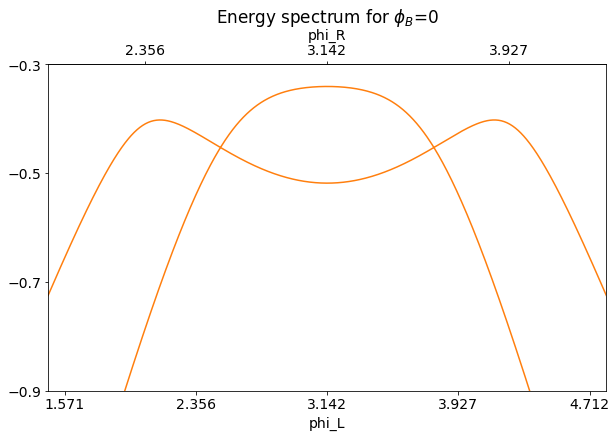

In [104]:
def LtoR(x):
    return slope*x+offset
def RtoL(x):
    return (x-offset)/slope

slope=0.719548004
offset=0.881065915
dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)
Ec=Ej=1
plt.close('all')
fig,ax=plt.subplots(figsize=(10,6))
plt.title('Energy spectrum for $\phi_B$=0')
plt.rcParams.update({'font.size': 14})

alpha=1
lw=2
for i in range(2):
    plt.plot(phiLlist,E1[i]/np.sqrt(2*Ec*Ej),color='tab:orange')
    
plt.xticks(np.arange(0,(9/4)*np.pi,np.pi/4))    

secax = ax.secondary_xaxis('top', functions=(LtoR,RtoL))
secax.set_xlabel('phi_R')
secax.set_ticks(np.arange(0,(9/4)*np.pi,np.pi/4))

plt.xlabel('phi_L')
plt.xlim(left=np.pi/2-0.1,right=3*np.pi/2+0.1)

ymin,ymax=-0.9,-0.3
plt.ylim(bottom=ymin,top=ymax)
plt.yticks(np.arange(ymin,ymax,0.2))
plt.show()

## $\phi_B=0.9$

**compute spectrum**

==> can be skipped by loading data below

In [25]:
# %%time
N=13
nbands=9

#init all param to base value
Ej,Ec=1,1

ng=0.254116991
ng1=ng2=ng
asym=[1,0.8,1.1,0.9,1.2]

phiB=0.9

slope=0.719548004
offset=0.651269121

dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)


E2=np.zeros([nbands,dim])
for i in range(dim):
    phiL=phiLlist[i]
    phiR=phiRlist[i]
    param=[N,Ej,Ec,ng1,ng2,phiL,phiR,phiB,asym]
    H=JHD.getH(param)

    E2[:,i],V=topo.compute_ev(H,nbands)

**load data**

In [26]:
# with open('fig4_data/JHD_fig4_spectrum_2.pkl', 'wb') as outfile:
#     pickle.dump(E2,outfile)

In [80]:
with open('fig4_data/JHD_fig4_spectrum_2.pkl', 'rb') as outfile:
    E2=pickle.load(outfile)

**plot data**

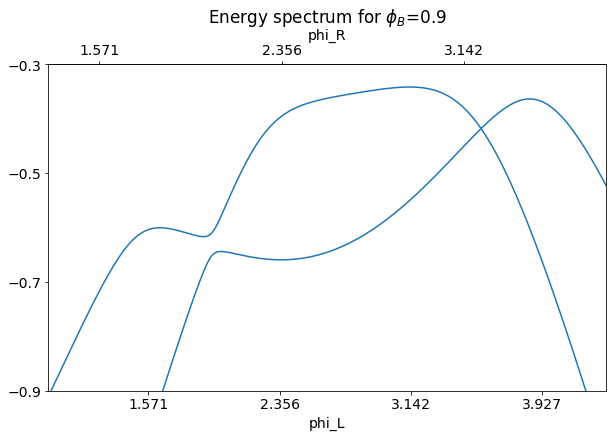

In [105]:
def LtoR(x):
    return slope*x+offset
def RtoL(x):
    return (x-offset)/slope

slope=0.719548004
offset=0.651269121

dim=1501
phiLmin=0
phiLmax=2*np.pi
phiLlist,phiRlist=cut(slope,offset,phiLmin,phiLmax,dim)
Ec=Ej=1

fig,ax=plt.subplots(figsize=(10,6))

plt.title('Energy spectrum for $\phi_B$=0.9')
for i in range(2):
    plt.plot(phiLlist,E2[i]/np.sqrt(2*Ec*Ej),color='tab:blue')
plt.rcParams.update({'font.size': 14})

plt.xticks(np.arange(0,(9/4)*np.pi,np.pi/4))    

secax = ax.secondary_xaxis('top', functions=(LtoR,RtoL))
secax.set_xlabel('phi_R')
secax.set_ticks(np.arange(0,(9/4)*np.pi,np.pi/4))

plt.xlabel('phi_L')
plt.xlim(left=np.pi/2-0.6,right=3*np.pi/2-0.4)

ymin,ymax=-0.9,-0.3
plt.ylim(bottom=ymin,top=ymax)
plt.yticks(np.arange(ymin,ymax,0.2))
plt.show()

# Degeneracy in 3D BZ

## $\phi_B=0$

Search 3D parameter space comprised of $\phi_L,\phi_R,n_{g1}=n_{g2}=n_g$

Do it in asymmetric case of figure 4

In [88]:
%%time

[N,Ec,Ej]=[11,1,1]
asym=[1,0.8,1.1,0.9,1.2]

tol=1e-8

phiB=0

philist=[0,np.pi-0.1,np.pi,np.pi+0.1,2*np.pi]
dimphi=len(philist)

nglist=[0,0.49,0.51,1]
dimng=len(nglist)

deg_gap_1=[]
deg_pos_1=[]

param=[N,Ej,Ec,phiB,asym,tol]
for ing,ng in enumerate(nglist):
    for iphiL,phiL in enumerate(philist):
        for iphiR,phiR in enumerate(philist):
            if iphiL==0 or iphiR==0 or ing==0: continue

            bnds=((philist[iphiL-1],philist[iphiL]), (philist[iphiR-1],philist[iphiR]), (nglist[ing-1],nglist[ing]) )

            temp_deg=shgo(JHD.minimize_phiL_phiR_ng,bnds,args=param, \
                          n=50, iters=6, sampling_method='sobol', \
                          minimizer_kwargs={'method':'SLSQP', 'options':{'options':{'ftol':1e-8, 'eps':1e-10, 'maxiter':100}}}, \
                          options={'ftol':1e-8, 'maxtime':60, 'local_iter':10} )

            for ideg in range(len(temp_deg.funl)):
                if temp_deg.funl[ideg]<1e-6:
                    deg_gap_1.append(temp_deg.funl[ideg])
                    deg_pos_1.append(temp_deg.xl[ideg])
                    print(f'gap: {temp_deg.funl[ideg]} \t phiLR: {temp_deg.xl[ideg]}')

/mnt/users/Léo/github/JHD-paper-zenodo/JHD.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  #reshape (1,N) into (N) for shgo algorithm
/home/leo/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/leo/anaconda3/lib/python3.7/site-packages/scipy/optimize/_shgo.py:1159: OptimizeWarning: Unknown solver options: options
  lres = minimize(self.func, x_min, **self.minimizer_kwargs)


gap: 2.241558771931551e-08 	 phiLR: [2.50260261 2.68180872 0.259773  ]
gap: 4.683663568094687e-09 	 phiLR: [3.78058266 3.60137658 0.259773  ]
gap: 3.387816616129413e-08 	 phiLR: [3.78058267 3.60137657 0.25977297]
gap: 1.6772655153651783e-08 	 phiLR: [2.50260263 2.68180872 0.74022719]
gap: 7.602328766509459e-09 	 phiLR: [3.78058266 3.60137657 0.74022719]
CPU times: user 3min 35s, sys: 703 ms, total: 3min 36s
Wall time: 3min 44s


In [94]:
# with open('fig4_data/JHD_fig4_cube_1.pkl', 'wb') as outfile:
#     pickle.dump([deg_gap_1,deg_pos_1],outfile)

**Load data**

In [95]:
with open('fig4_data/JHD_fig4_cube_1.pkl', 'rb') as outfile:
    [deg_gap_1,deg_pos_1]=pickle.load(outfile)

**Plot degeneracies in 3D parameter space**

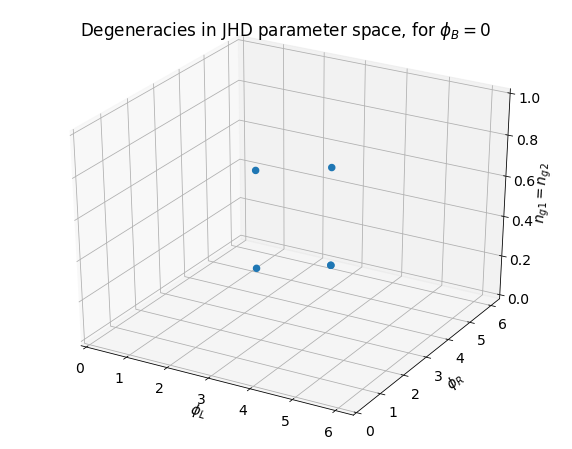

In [106]:
deg_pos_1=np.array(deg_pos_1)

fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})

ax = fig.add_subplot(111, projection='3d')
plt.title('Degeneracies in JHD parameter space, for $\phi_B=0$')
ax.scatter(deg_pos_1[:,0],deg_pos_1[:,1],deg_pos_1[:,2],alpha=1,lw=3)
ax.set_xlim([0,2*np.pi])
ax.set_ylim([0,2*np.pi])
ax.set_zlim([0,1])
ax.set_xlabel('$\phi_L$')
ax.set_ylabel('$\phi_R$')
ax.set_zlabel('$n_{g1}=n_{g2}$')
plt.show()

## $\phi_B=0.9$

In [98]:
%%time

[N,Ec,Ej]=[11,1,1]
asym=[1,0.8,1.1,0.9,1.2]

tol=1e-8

phiB=0.9

philist=[0,np.pi-0.1,np.pi,np.pi+0.1,2*np.pi]
dimphi=len(philist)

nglist=[0,0.49,0.51,1]
dimng=len(nglist)

deg_gap_2=[]
deg_pos_2=[]

param=[N,Ej,Ec,phiB,asym,tol]
for ing,ng in enumerate(nglist):
    for iphiL,phiL in enumerate(philist):
        for iphiR,phiR in enumerate(philist):
            if iphiL==0 or iphiR==0 or ing==0: continue

            bnds=((philist[iphiL-1],philist[iphiL]), (philist[iphiR-1],philist[iphiR]), (nglist[ing-1],nglist[ing]) )

            temp_deg=shgo(JHD.minimize_phiL_phiR_ng,bnds,args=param, \
                          n=50, iters=6, sampling_method='sobol', \
                          minimizer_kwargs={'method':'SLSQP', 'options':{'options':{'ftol':1e-8, 'eps':1e-10, 'maxiter':100}}}, \
                          options={'ftol':1e-8, 'maxtime':60, 'local_iter':10} )

            for ideg in range(len(temp_deg.funl)):
                if temp_deg.funl[ideg]<1e-6:
                    deg_gap_2.append(temp_deg.funl[ideg])
                    deg_pos_2.append(temp_deg.xl[ideg])
                    print(f'gap: {temp_deg.funl[ideg]} \t phiLR: {temp_deg.xl[ideg]}')

gap: 1.3431434742194881e-08 	 phiLR: [1.92038485 2.0659114  0.42103137]
gap: 2.0713059933896716e-08 	 phiLR: [1.92038508 2.06591128 0.42103134]
gap: 2.4570166234916258e-08 	 phiLR: [3.56323001 3.21518416 0.2541156 ]
gap: 1.532828142192244e-08 	 phiLR: [1.92038496 2.06591133 0.57896861]
gap: 2.0060686112266524e-08 	 phiLR: [1.9203851  2.06591127 0.5789686 ]
gap: 1.9279070340161297e-08 	 phiLR: [3.56323002 3.21518416 0.74588447]
CPU times: user 3min 38s, sys: 547 ms, total: 3min 38s
Wall time: 3min 47s


**Save/Load data**

In [99]:
# with open('fig4_data/JHD_fig4_cube_2.pkl', 'wb') as outfile:
#     pickle.dump([deg_gap_2,deg_pos_2],outfile)

In [100]:
with open('fig4_data/JHD_fig4_cube_2.pkl', 'rb') as outfile:
    [deg_gap_2,deg_pos_2]=pickle.load(outfile)

**Plot degeneracies in 3D parameter space**

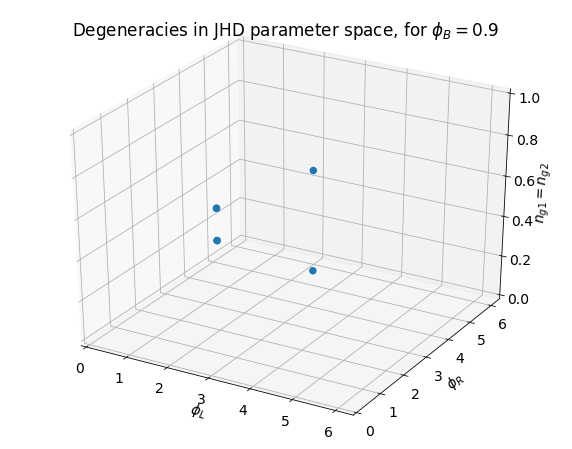

In [102]:
deg_pos_2=np.array(deg_pos_2)

fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})
ax = fig.add_subplot(111, projection='3d')
plt.title('Degeneracies in JHD parameter space, for $\phi_B=0.9$')
ax.scatter(deg_pos_2[:,0],deg_pos_2[:,1],deg_pos_2[:,2],alpha=1,lw=3)
ax.set_xlim([0,2*np.pi])
ax.set_ylim([0,2*np.pi])
ax.set_zlim([0,1])
ax.set_xlabel('$\phi_L$')
ax.set_ylabel('$\phi_R$')
ax.set_zlabel('$n_{g1}=n_{g2}$')
plt.show()

# Chern number

Compute Chern number as shown in fig4.d

## Generate data

Chern is computed by integrating the Berry curvature $B_{\phi_R,\phi_L}$ on a $\phi_L,\phi_R$ plane at fixed $\phi_B$ and $n_g$.

For a good accuracy, a fine $\phi_L,\phi_R$ grid is necessary. This requires a relatively long computation time (several hours to days).

Datas are available in the next part for $\phi_B=0.9$.

In [65]:
%%time
N=9
nbands=7

#init all param to base value
Ej,Ec=1,1

asym=[1,0.8,1.1,0.9,1.2]


dimphi=301
phiList=np.linspace(0,2*np.pi,dimphi)

dimng=35
nglist=np.linspace(0,0.5,dimng)

phiB=0.9

Chern=np.zeros([dimng])

for ing,ng in enumerate(nglist):
    BC=np.zeros([dimphi,dimphi])
    for i,phiL in enumerate(phiList):
        for j,phiR in enumerate(phiList):
            paramH=[N,Ej,Ec,ng,ng,phiL,phiR,phiB,asym]
            H=JHD.getH(paramH)
            paramdH=[N,Ej,phiL,phiR,phiB,asym]
            dH=JHD.getdH_LR(paramdH)
            BC[i,j]=topo.compute_BC(H,dH,nbands)
    Chern[ing]=np.trapz( np.trapz(BC,phiList),phiList)/2/np.pi
    print(f'ng = {ng} \t Chern={Chern[ing]}')


ng = 0.0 	 Chern=-2.107810744357941e-14
ng = 0.014705882352941176 	 Chern=-0.019369956056837216
ng = 0.029411764705882353 	 Chern=-0.0384808731735683
ng = 0.044117647058823525 	 Chern=-0.057162557828108425
ng = 0.058823529411764705 	 Chern=-0.07518580086855567
ng = 0.07352941176470588 	 Chern=-0.09218002589289084
ng = 0.08823529411764705 	 Chern=-0.10759727468808215
ng = 0.10294117647058823 	 Chern=-0.12068499182874547
ng = 0.11764705882352941 	 Chern=-0.13045386395532402
ng = 0.1323529411764706 	 Chern=-0.1356510156348101
ng = 0.14705882352941177 	 Chern=-0.1348600796778147
ng = 0.16176470588235295 	 Chern=-0.12659976318984606
ng = 0.1764705882352941 	 Chern=-0.10960043734707196
ng = 0.19117647058823528 	 Chern=-0.08266045618625284
ng = 0.20588235294117646 	 Chern=-0.045240165764636214
ng = 0.22058823529411764 	 Chern=0.0018983295116372725
ng = 0.23529411764705882 	 Chern=0.05670173288577165
ng = 0.25 	 Chern=0.11586721216517844
ng = 0.2647058823529412 	 Chern=0.1752242562617101
ng = 

## load computed data for $\phi_B=0.9$

Parameters used: phiB=0.9,N=9,nbands=7,dimphi=301,dimng=35,asym=[1,0.8,1.1,0.9,1.2]

In [73]:
#load computed Chern number for ng in [0,0.5]
with open('fig4_data/JHD_fig4_chern_phiB09.pkl', 'rb') as outfile:
    Chern=pickle.load(outfile)[0]

# mirror Chern for ng in [0.5,1]
Chern_=Chern[2,1:]
Chern=np.hstack((Chern[2],-Chern_[::-1]))

#global minus sign to follow convention defined in appendix A of https://arxiv.org/pdf/2009.03291.pdf
Chern=-Chern

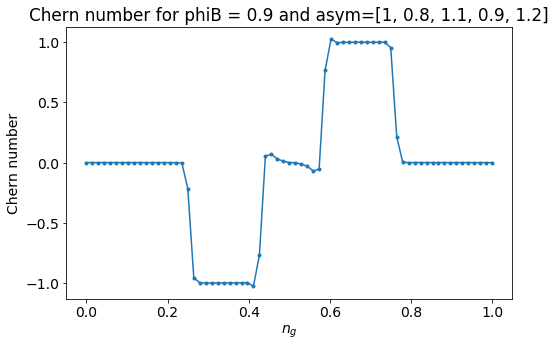

In [103]:
dimphi=301

#define nglist, and mirror for ng above 0.5
dimng=35
nglist=np.linspace(0,0.5,dimng)
temp=nglist+0.5
nglist=np.hstack((nglist,temp[1:]))

fig,ax=plt.subplots(figsize=(8,5))
plt.title(f'Chern number for phiB = {1.0*phiB:.4} and asym={asym}')
plt.rcParams.update({'font.size': 14})

plt.plot(nglist,Chern,'.-')

plt.xlabel('$n_g$')
plt.ylabel('Chern number')
plt.show()